# Рекомендация тарифов

Заказчик: федеральный телеком-оператор.

Заказчиком предоставлены данные о поведении клиентов, которые уже перешли на исследуемые тарифы.

Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

Предобработка данных уже сделана.

Цель: построить модель с максимально большим значением *accuracy* (в рамках проекта >= 0.75).

## Описание тарифов

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    *	минута разговора: 3 рубля
    *	сообщение: 3 рубля
    *	1 Гб интернет-трафика: 200 рублей
    
Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    *	минута разговора: 1 рубль
    *	сообщение: 1 рубль
    *	1 Гб интернет-трафика: 150 рублей
    
Примечание: 
* Тарифы предполагают округление секунд до минут, а мегабайтов — до гигабайт.
* Каждый звонок округляется отдельно, даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Загрузка и изучение файла

In [147]:
# загружаем необходимые библиотеки и определяем пространства имён
import pandas as pd
#import math
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

import random

%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.ticker as plticker
import numpy as np
#import scipy.stats as st
#from functools import reduce
#idx = pd.IndexSlice

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#включим отображение всех столбцов таблиц и округлим числа до сотых
pd.set_option('display.max_columns', None)
#pd.options.display.float_format = '{:,.2f}'.format

In [148]:
# загружаем файл с данными
try:
    df = pd.read_csv('datasets/data_09/users_behavior.csv') # locally hosted datafile ## , sep='\t'
except:
    df = pd.read_csv('/datasets/users_behavior.csv') # Yandex-hosted datafile  ## , sep='\t'

# общий анализ структуры и состава загруженного файла
df.info()
print("\nЧисло пропусков в данных:\n", df.isna().sum())
display(df.describe())
display(df.sample(10))

print('\nПроверка сбалансированности таргетов:\n',df['is_ultra'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

Число пропусков в данных:
 calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


,calls,minutes,messages,mb_used,is_ultra
40,34.0,183.28,0.0,18631.66,0
730,36.0,259.50,8.0,7417.14,0
694,40.0,289.22,22.0,19352.50,1
3174,79.0,537.10,25.0,21223.37,0
184,73.0,576.62,42.0,7865.58,0
1431,43.0,314.37,43.0,10015.52,1
197,12.0,107.25,5.0,2016.72,0
2876,59.0,388.81,27.0,19021.86,1
2838,41.0,276.03,72.0,2621.83,1
215,35.0,267.67,25.0,18231.83,0



Проверка сбалансированности таргетов:
 0    2229
1     985
Name: is_ultra, dtype: int64


## Выводы по шагу 1

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Имена колонок не требуют вмешательств
* Пропусков в данных нет
* Число звонков и сообщений можно преобразовать в целые числа, при явной необходимости это будет сделано
* Исходя из описания задачи допустим, что дублей в строках нет

## Получение выборок для обучения модели

In [149]:
#Разделяем датасет на стандартный набор выборок
###df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)
###df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=12345)

# правки v1
# df_combined будет использоваться в обучении модели для проверки адекватности
df_train, df_combined = train_test_split(df, test_size=0.4, random_state=12345, stratify=df[['is_ultra']])
df_valid, df_test = train_test_split(df_combined, test_size=0.5, random_state=12345, stratify=df_combined[['is_ultra']])

print('Размер обучающей выборки (объектов):', df_train.shape[0])
print('Размер валидационной выборки (объектов):', df_valid.shape[0])
print('Размер тестовой выборки (объектов):',df_test.shape[0])
print('Размер объединённой тестовой выборки (объектов):',df_combined.shape[0])

print('\nПроверка сбалансированности таргетов:')
print('df_train:\n', df_train['is_ultra'].value_counts())
print('df_valid:\n', df_valid['is_ultra'].value_counts())
print('df_test:\n', df_test['is_ultra'].value_counts())
print('df_combined:\n', df_combined['is_ultra'].value_counts())

Размер обучающей выборки (объектов): 1928
Размер валидационной выборки (объектов): 643
Размер тестовой выборки (объектов): 643
Размер объединённой тестовой выборки (объектов): 1286

Проверка сбалансированности таргетов:
df_train:
 0    1337
1     591
Name: is_ultra, dtype: int64
df_valid:
 0    446
1    197
Name: is_ultra, dtype: int64
df_test:
 0    446
1    197
Name: is_ultra, dtype: int64
df_combined:
 0    892
1    394
Name: is_ultra, dtype: int64


## Выводы по шагу 2

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Данные разбиты на три выборки: обучающую, валидационную и тестовую

## Исследование различных моделей

In [150]:
#Создадим стандартный набор параметров модели
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

#Выборка для валидации
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

#Выборка для валидации - расширенная
features_combined = df_combined.drop(['is_ultra'], axis=1)
target_combined = df_combined['is_ultra']

#Обучающая выборка
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

#Тестовая выборка
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

### Модель логистической регрессии

accuracy:[ 0.7387247278382582 ]
accuracy:[ 0.71850699844479 ]
accuracy:[ 0.7122861586314152 ]
accuracy:[ 0.7107309486780715 ]




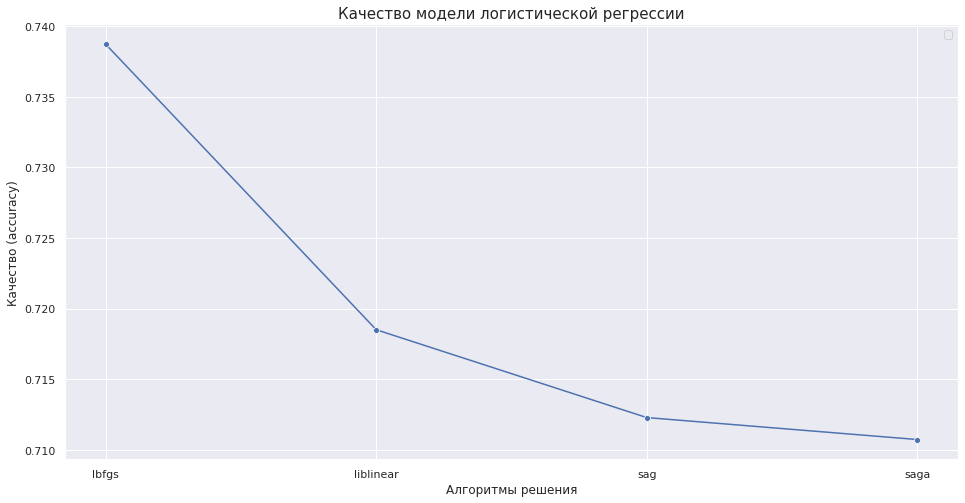

In [151]:
#Исследуем обучение модели без гиперпараметров :)
lr_accuracy = {}
lr_predictions = {}
lr_solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#list(dict.keys()) list(dict.values())  #end=''

plt.figure(figsize=(16, 8))

for solver in range(1,len(lr_solvers)):
    model = LogisticRegression(random_state=12345, solver=lr_solvers[solver], max_iter=4000)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)
    lr_accuracy[lr_solvers[solver]] = score
    lr_predictions[lr_solvers[solver]] = predictions
    print('accuracy:[', score, ']')

print('\n')
sns.lineplot(data=pd.DataFrame(data=list(lr_accuracy.values()), index=list(lr_accuracy.keys())), markers=True)
plt.legend('')
plt.title("Качество модели логистической регрессии", fontsize=15) 
plt.ylabel("Качество (accuracy)") 
plt.xlabel("Алгоритмы решения")
plt.show()
print('\n\n')

### Модель "Дерево решений"

depth: [ 1 ]	accuracy:[ 0.7402799377916018 ]
depth: [ 2 ]	accuracy:[ 0.7729393468118196 ]
depth: [ 3 ]	accuracy:[ 0.7776049766718507 ]
depth: [ 4 ]	accuracy:[ 0.7542768273716952 ]
depth: [ 5 ]	accuracy:[ 0.7853810264385692 ]
depth: [ 6 ]	accuracy:[ 0.7744945567651633 ]
depth: [ 7 ]	accuracy:[ 0.7869362363919129 ]
depth: [ 8 ]	accuracy:[ 0.80248833592535 ]
depth: [ 9 ]	accuracy:[ 0.7822706065318819 ]




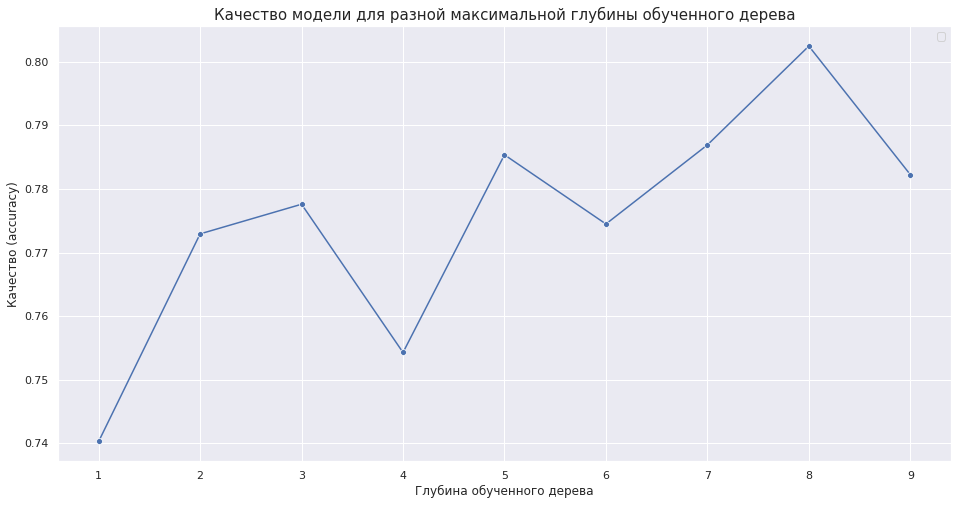

In [152]:
#Исследуем обучение модели с разными гиперпараметрами
dtc_accuracy = {}
dtc_predictions = {}

plt.figure(figsize=(16, 8))

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)
    dtc_accuracy[depth] = score
    dtc_predictions[depth] = predictions
    print('depth: [', depth, ']\taccuracy:[', score, ']')

print('\n')
sns.lineplot(data=pd.DataFrame(data=list(dtc_accuracy.values()), index=list(dtc_accuracy.keys())),dashes=False, markers=True)
plt.legend('')
plt.title("Качество модели для разной максимальной глубины обученного дерева", fontsize=15) 
plt.ylabel("Качество (accuracy)") 
plt.xlabel("Глубина обученного дерева")
plt.show()
print('\n\n')

### Модель "Случайный лес"

estimator: [ 10 ]	accuracy:[ 0.7869362363919129 ]
estimator: [ 15 ]	accuracy:[ 0.7884914463452566 ]
estimator: [ 20 ]	accuracy:[ 0.7916018662519441 ]
estimator: [ 25 ]	accuracy:[ 0.7947122861586314 ]
estimator: [ 30 ]	accuracy:[ 0.7931570762052877 ]
estimator: [ 35 ]	accuracy:[ 0.7931570762052877 ]
estimator: [ 40 ]	accuracy:[ 0.7931570762052877 ]
estimator: [ 45 ]	accuracy:[ 0.8009331259720062 ]
estimator: [ 50 ]	accuracy:[ 0.8055987558320373 ]
estimator: [ 55 ]	accuracy:[ 0.8009331259720062 ]
estimator: [ 60 ]	accuracy:[ 0.8102643856920684 ]
estimator: [ 65 ]	accuracy:[ 0.8055987558320373 ]
estimator: [ 70 ]	accuracy:[ 0.8009331259720062 ]




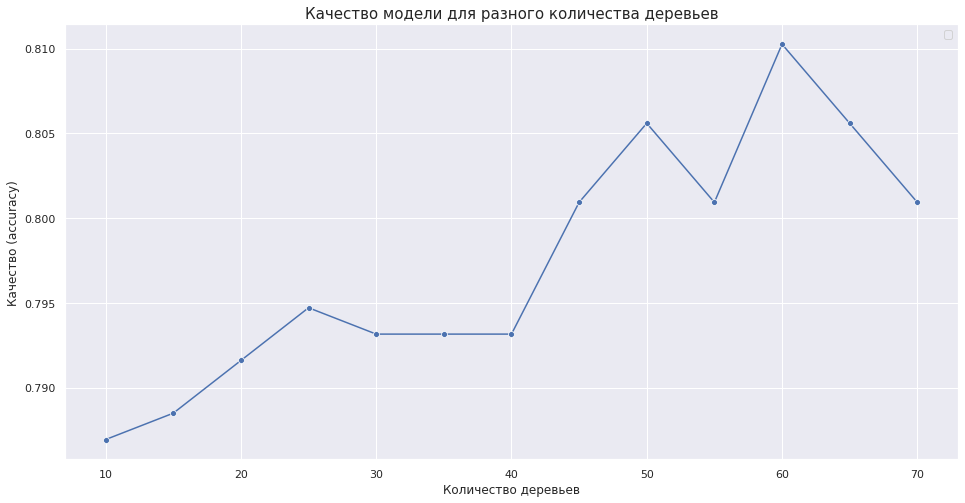

In [153]:
#Исследуем обучение модели с разными гиперпараметрами
rfc_accuracy = {}
rfc_predictions = {}

plt.figure(figsize=(16, 8))

for estimator in range(10,71,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)
    rfc_accuracy[estimator] = score
    rfc_predictions[estimator] = predictions
    print('estimator: [', estimator, ']\taccuracy:[', score, ']')

print('\n')
sns.lineplot(data=pd.DataFrame(data=list(rfc_accuracy.values()), index=list(rfc_accuracy.keys())),dashes=False, markers=True)
plt.legend('')
plt.title("Качество модели для разного количества деревьев", fontsize=15) 
plt.ylabel("Качество (accuracy)") 
plt.xlabel("Количество деревьев")
plt.show()

### Модель "Ближайших соседей"

neighbours: [ 1 ]	accuracy:[ 0.7045101088646968 ]
neighbours: [ 4 ]	accuracy:[ 0.7511664074650077 ]
neighbours: [ 7 ]	accuracy:[ 0.776049766718507 ]
neighbours: [ 10 ]	accuracy:[ 0.7636080870917574 ]
neighbours: [ 13 ]	accuracy:[ 0.744945567651633 ]
neighbours: [ 16 ]	accuracy:[ 0.7480559875583204 ]
neighbours: [ 19 ]	accuracy:[ 0.7527216174183515 ]
neighbours: [ 22 ]	accuracy:[ 0.7465007776049767 ]
neighbours: [ 25 ]	accuracy:[ 0.7402799377916018 ]




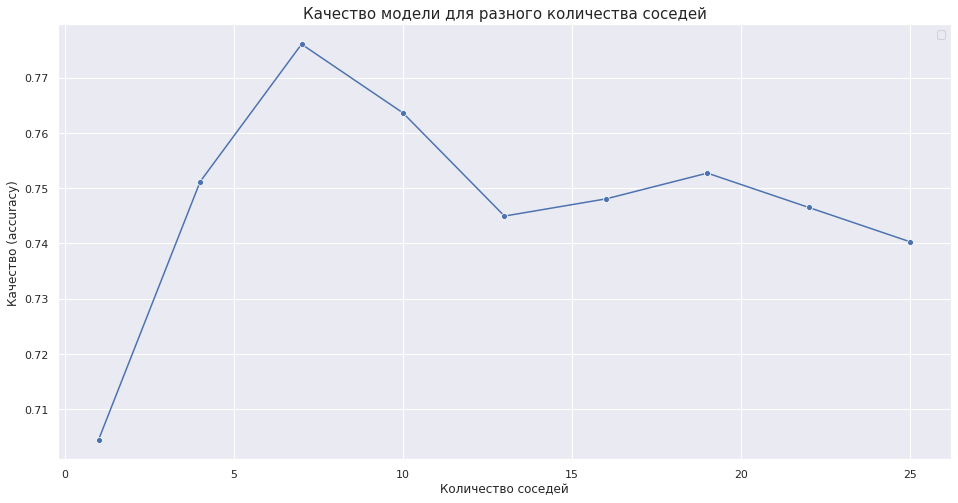

In [154]:
#Исследуем обучение модели с разными гиперпараметрами
knc_accuracy = {}
knc_predictions = {}

plt.figure(figsize=(16, 8))

for neighbours in range(1,28,3):
    model = KNeighborsClassifier(n_neighbors=neighbours)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions)
    knc_accuracy[neighbours] = score
    knc_predictions[neighbours] = predictions
    print('neighbours: [', neighbours, ']\taccuracy:[', score, ']')

print('\n')
sns.lineplot(data=pd.DataFrame(data=list(knc_accuracy.values()), index=list(knc_accuracy.keys())),dashes=False, markers=True)
plt.legend('')
plt.title("Качество модели для разного количества соседей", fontsize=15) 
plt.ylabel("Качество (accuracy)") 
plt.xlabel("Количество соседей")
plt.show()
print('\n\n')

### Выбор модели с лучшим качеством

In [155]:
#Создадим таблицу качества всех изученных моделей
models = ['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier', 'LogisticRegression']

rfc_values = list(rfc_accuracy.values())
dtc_values = list(dtc_accuracy.values())
knc_values = list(knc_accuracy.values())
lr_values = list(lr_accuracy.values())

max_len = max(len(rfc_values), len(dtc_values), len(knc_values), len(lr_values))

model_quality = pd.DataFrame(columns=models, index=np.arange(max_len))
#model_quality.info()
#model_quality = pd.DataFrame(columns=models)

model_quality['DecisionTreeClassifier'][:len(dtc_values)] = dtc_values
model_quality['KNeighborsClassifier'][:len(knc_values)] = knc_values
model_quality['LogisticRegression'][:len(lr_values)] = lr_values
model_quality['RandomForestClassifier'][:len(rfc_values)] = rfc_values

#строки - запретить!
model_quality = model_quality.astype('float64')

display(model_quality)
model_quality.info()

,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
0,0.740280,0.786936,0.704510,0.738725
1,0.772939,0.788491,0.751166,0.718507
2,0.777605,0.791602,0.776050,0.712286
3,0.754277,0.794712,0.763608,0.710731
4,0.785381,0.793157,0.744946,NaN
5,0.774495,0.793157,0.748056,NaN
6,0.786936,0.793157,0.752722,NaN
7,0.802488,0.800933,0.746501,NaN
8,0.782271,0.805599,0.740280,NaN
9,NaN,0.800933,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DecisionTreeClassifier  9 non-null      float64
 1   RandomForestClassifier  13 non-null     float64
 2   KNeighborsClassifier    9 non-null      float64
 3   LogisticRegression      4 non-null      float64
dtypes: float64(4)
memory usage: 520.0 bytes


<AxesSubplot:title={'center':'Сравнение моделей по качеству'}, ylabel='Качество'>

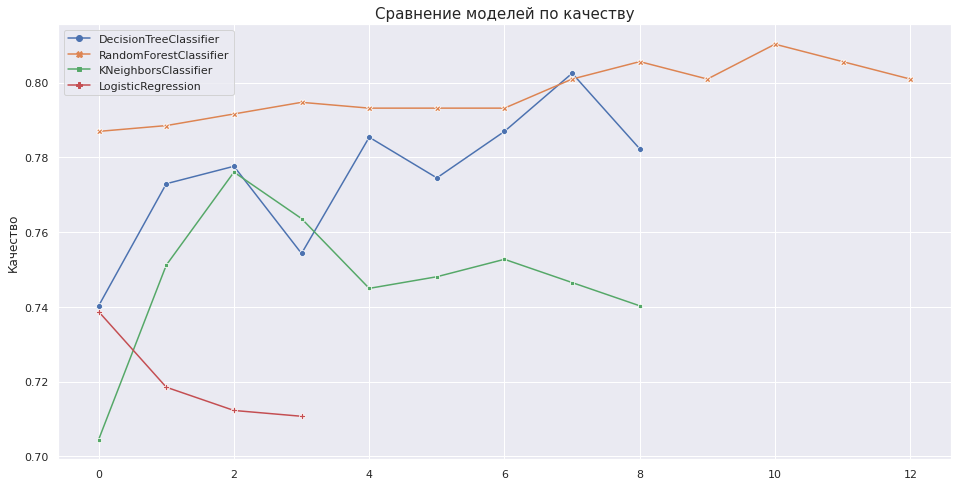

In [156]:
#Отразим качество моделей на графике
plt.figure(figsize=(16,8))

plt.title('Сравнение моделей по качеству', fontsize=15)
plt.xlabel('')
plt.ylabel('Качество')
sns.lineplot(data=model_quality, dashes=False, markers=True)

## Выводы по шагу 3

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Исследованы четыре модели: 
    * логистической регрессии,
    * "Дерева решений",
    * "случайного леса",
    * "Ближайших соседей".
* Максимальное качество моделей:
    * логистическая регрессия в данном задании обладает слабой предсказательной ценностью. Максимальное качество (0.7387247278382582) даёт солвер 'newton-cg'.
    * "Дерево решений" при глубине 8 даёт качество 0.80248833592535
    * "Случайный лес" при числе деревьев 60 даёт качество 0.8102643856920684
    * Метод "Ближайших соседей" при их числе равном 7 даёт качество neighbours: 0.776049766718507
* Таким образом, по качеству лидирует модель "Случайного леса" с 60 деревьями решений

## Проверка моделей с оптимальными гиперпараметрами на тестовой выборке

In [157]:
#Проверим модель "случайного леса" на тестовой выборке при 50 деревьях
model = RandomForestClassifier(random_state=12345, n_estimators=60)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)
print('Качество модели при числе деревьев 60:', score)

model = RandomForestClassifier(random_state=12345, n_estimators=50)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
score = accuracy_score(target_test, predictions)
print('Качество модели при числе деревьев 50:', score)

# v1 - обучение модели на тренировочной + валидационной выборке
model_combined = RandomForestClassifier(random_state=12345, n_estimators=50)
model_combined.fit(features_combined, target_combined)
predictions_ext = model_combined.predict(features_test)
score_ext = accuracy_score(target_test, predictions)
print('Качество модели по объединённым выборкам (50):', score_ext)

# v1 - обучение модели на тренировочной + валидационной выборке
model_combined = RandomForestClassifier(random_state=12345, n_estimators=60)
model_combined.fit(features_combined, target_combined)
predictions_ext = model_combined.predict(features_test)
score_ext = accuracy_score(target_test, predictions)
print('Качество модели по объединённым выборкам (60):', score_ext)

Качество модели при числе деревьев 60: 0.7978227060653188
Качество модели при числе деревьев 50: 0.8040435458786936
Качество модели по объединённым выборкам (50): 0.8040435458786936
Качество модели по объединённым выборкам (60): 0.8040435458786936


## Выводы по шагу 4

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Показатель качества выбранной модели "случайного леса" при 60 деревьях превышает пороговый показатель 0.75, задание можно считать выполненным успешно

## Проверка модели на адекватность

In [158]:
dummy = DummyClassifier(strategy='most_frequent', random_state=12345).fit(features_train, target_train)
print('Accuracy Dummy-модели на тестовой выборке:', dummy.score(features_test, target_test))

dummy_zeroes = [0 for count in range(len(target_test))]
dz_accuracy = accuracy_score(target_test, dummy_zeroes)
print('Accuracy списка из нулей на тестовой выборке:', dz_accuracy)

dummy_ones = [1 for count in range(len(target_test))]
do_accuracy = accuracy_score(target_test, dummy_ones)
print('Accuracy списка из единиц на тестовой выборке:', do_accuracy)

dummy_random = [random.randint(0,1) for count in range(len(target_test))]
dr_accuracy = accuracy_score(target_test, dummy_random)
print('Accuracy списка случайных значений на тестовой выборке:', dr_accuracy)

Accuracy Dummy-модели на тестовой выборке: 0.6936236391912908
Accuracy списка из нулей на тестовой выборке: 0.6936236391912908
Accuracy списка из единиц на тестовой выборке: 0.30637636080870917
Accuracy списка случайных значений на тестовой выборке: 0.5085536547433903


## Выводы по шагу 5

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* показатель качества выбранной модели равен 0.8040435458786936 против Dummy-модели с 0.6936236391912908.
* можно считать, что выбранная модель адекватна и отличается от случайных / наиболее частых данных в тестовой выборке.

## Общий вывод

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Предобработка данных не требуется
* Данные разбиты на три выборки: обучающую, валидационную и тестовую
* В данных наблюдается преобладание таргетов со значением 0 в соотношении 2:1
* Исследованы четыре модели, их максимальное качество:
    * логистическая регрессия в данном задании обладает слабой предсказательной ценностью. Максимальное качество (0.7387247278382582) даёт солвер 'newton-cg'.
    * "Дерево решений" при глубине 8 даёт качество 0.80248833592535
    * "Случайный лес" при числе деревьев 60 даёт качество 0.8102643856920684
    * Метод "Ближайших соседей" при их числе равном 7 даёт качество neighbours: 0.776049766718507
* Таким образом, по качеству лидирует модель "Случайного леса" с 60 деревьями решений
* По показателю качества лидирует модель "Случайного леса" с 60 деревьями решений
* Показатель выбраннйо модели превышает пороговый показатель 0.75, задание выполнено
* Адекватность выбранной модели проверена с помощью Dummy-модели (accuracy=0.6936236391912908).
* Выбранная модель адекватна и отличается от случайных / наиболее частых данных в тестовой выборке.